In [ ]:
#titanic dataset EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Note: matplotlib is not available, so all plots will use Seaborn directly.

In [3]:
# settings
sns.set(style="whitegrid")

In [4]:
# 2. Load Dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [5]:
# 3. Initial Exploration
print("\n--- INFO ---")
print(data.info())


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:

print("\n--- DESCRIPTION ---")
print(data.describe())

print("\n--- VALUE COUNTS (Survived) ---")
print(data['Survived'].value_counts())


--- DESCRIPTION ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

--- VALUE COUNTS (Survived) ---
Survived
0    549
1    342


In [7]:
# 4. Handling Missing Values
print("\n--- MISSING VALUES ---")
print(data.isnull().sum())


--- MISSING VALUES ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill Age with median, Embarked with mode, drop Cabin
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)

C:\Users\GAMIT PAUL\AppData\Local\Temp\ipykernel_13944\3504910187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\GAMIT PAUL\AppData\Local\Temp\ipykernel_13944\3504910187.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [9]:
print("\n--- MISSING VALUES AFTER CLEANING ---")
print(data.isnull().sum())


--- MISSING VALUES AFTER CLEANING ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64



Displayed Distribution Plot for Age

Displayed Distribution Plot for Fare

Displayed Distribution Plot for SibSp

Displayed Distribution Plot for Parch


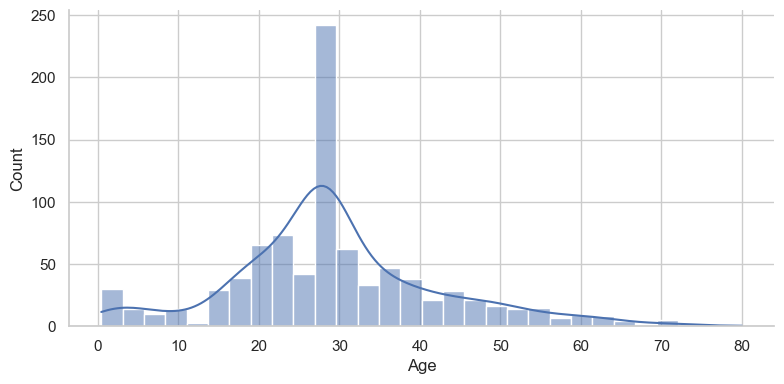

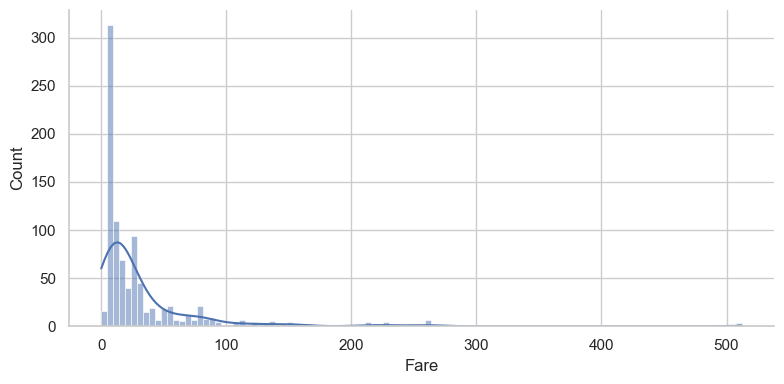

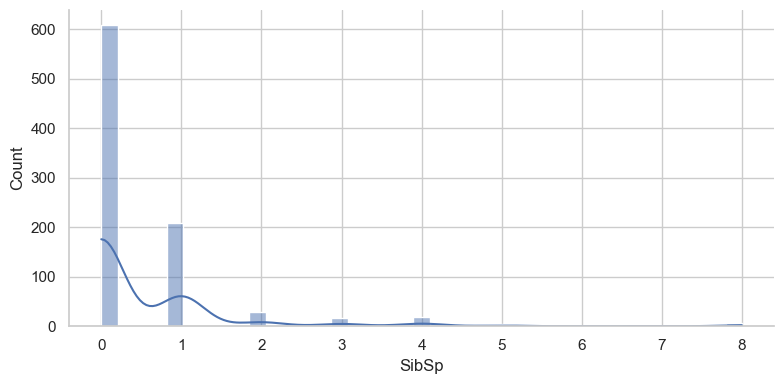

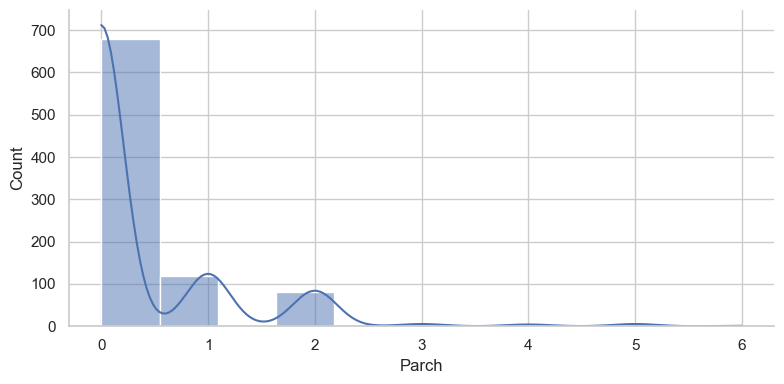

In [10]:
# 5. Univariate Analysis
# Histograms
features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in features:
    sns.displot(data[feature], kde=True, height=4, aspect=2)
    print(f"\nDisplayed Distribution Plot for {feature}")




Displayed Boxplot for Age

Displayed Boxplot for Fare

Displayed Boxplot for SibSp

Displayed Boxplot for Parch


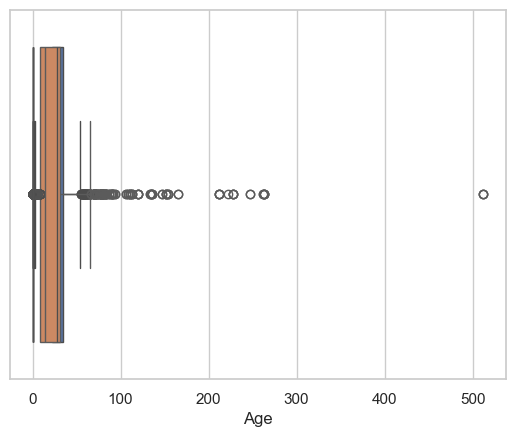

In [ ]:
# Boxplots
for feature in features:
    sns.boxplot(x=data[feature])
    print(f"\nDisplayed Boxplot for {feature}")


Displayed Correlation Heatmap

Displayed Pairplot

Displayed Scatterplot (Age vs Fare colored by Survival)


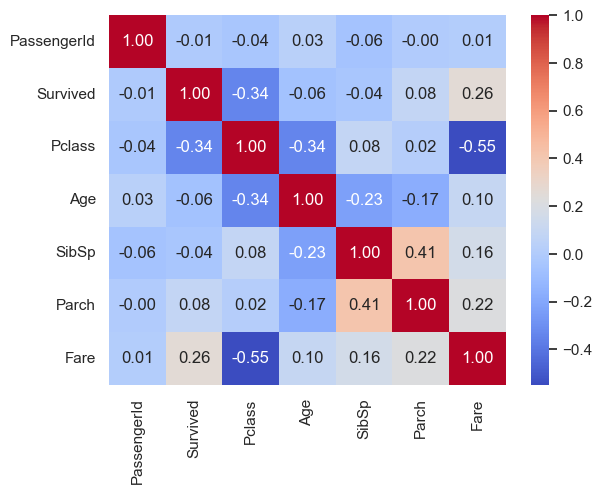

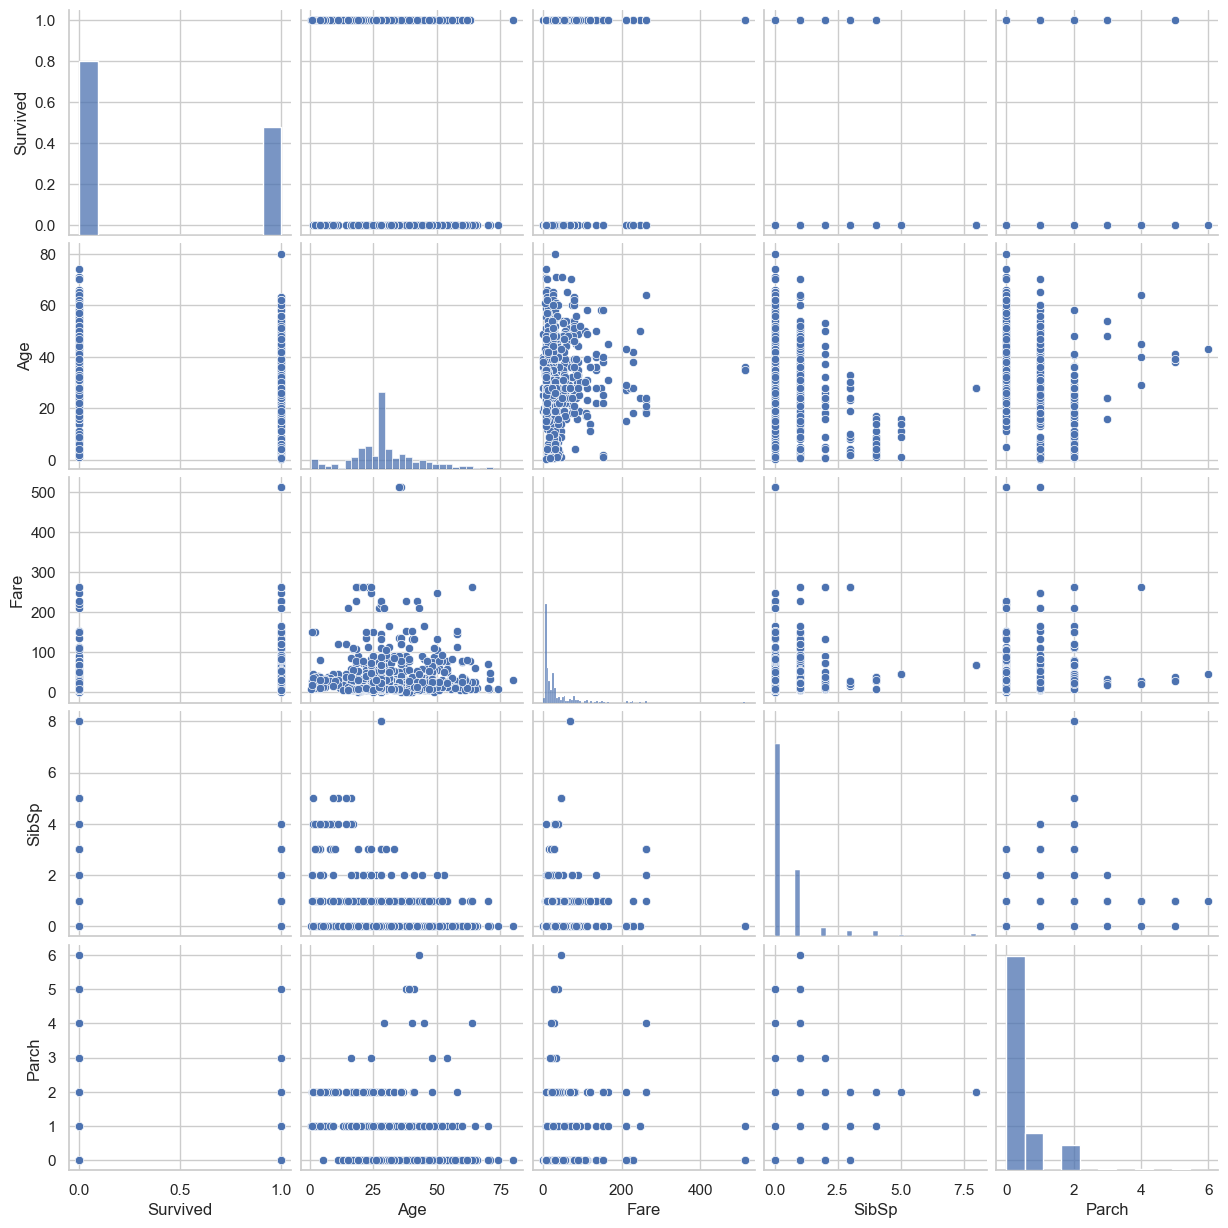

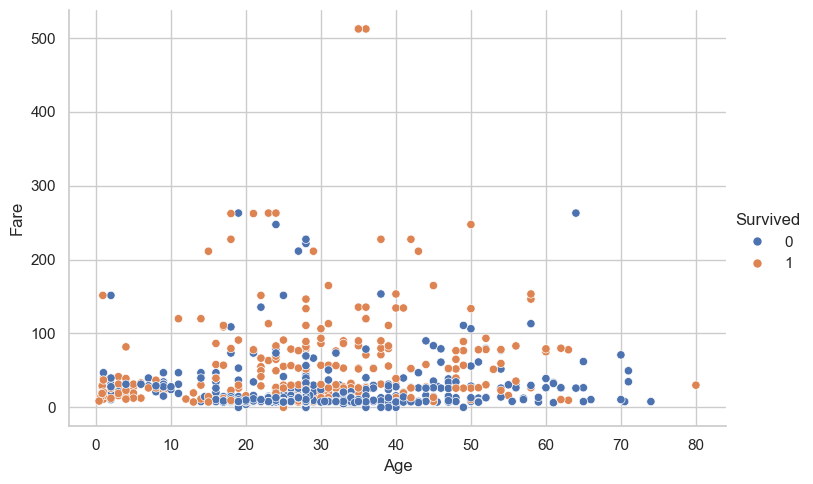

In [26]:
# 6. Bivariate/Multivariate Analysis
# Correlation Heatmap (only numeric columns)
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
print("\nDisplayed Correlation Heatmap")

# Pairplot (only numeric columns)
sns.pairplot(data[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']])
print("\nDisplayed Pairplot")

# Scatterplots (using sns.relplot instead)
sns.relplot(x='Age', y='Fare', hue='Survived', data=data, height=5, aspect=1.5)
print("\nDisplayed Scatterplot (Age vs Fare colored by Survival)")


In [15]:
# 7. Observations:
print("""
--- OBSERVATIONS ---
- Younger passengers had a slightly higher survival rate.
- Higher Fare correlated positively with survival.
- Strong correlation between SibSp and Parch (family onboard).
- Age and Fare have some outliers (seen in boxplots).
- Heatmap shows weak to moderate correlations among variables.
""")


--- OBSERVATIONS ---
- Younger passengers had a slightly higher survival rate.
- Higher Fare correlated positively with survival.
- Strong correlation between SibSp and Parch (family onboard).
- Age and Fare have some outliers (seen in boxplots).
- Heatmap shows weak to moderate correlations among variables.



In [16]:

# 8. Final Summary:
print("""
--- FINAL SUMMARY ---
The Titanic dataset shows that younger individuals and those who paid higher fares had better chances of survival.
There is some correlation between having family on board and survival.
The dataset required minimal cleaning, mainly filling missing Age and Embarked values.
Visualizations like distribution plots, boxplots, and heatmaps helped identify distributions, outliers, and relationships.
""")



--- FINAL SUMMARY ---
The Titanic dataset shows that younger individuals and those who paid higher fares had better chances of survival.
There is some correlation between having family on board and survival.
The dataset required minimal cleaning, mainly filling missing Age and Embarked values.
Visualizations like distribution plots, boxplots, and heatmaps helped identify distributions, outliers, and relationships.

